In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
id=load_iris()

In [4]:
dir(id)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
id.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
id.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df=pd.DataFrame(id.data,columns=id.feature_names)

In [9]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [11]:
df['target']=id.target

In [13]:
df_x=df.drop(columns=['target'],axis=1)

In [14]:
df_y=df['target']

creating training and testing data set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3)

model training

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier()

In [25]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

prediction

In [27]:
knn.predict(x_test)

array([1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2,
       0])

In [28]:
knn.score(x_test,y_test)

0.9555555555555556

changing value of k

In [40]:
knn.set_params(n_neighbors=10)

KNeighborsClassifier(n_neighbors=10)

In [41]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [43]:
knn.score(x_test,y_test)

0.9555555555555556

confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
y_pred=knn.predict(x_test)

In [46]:
cn=confusion_matrix(y_test,y_pred)

plotting confusion_matrix using heat map

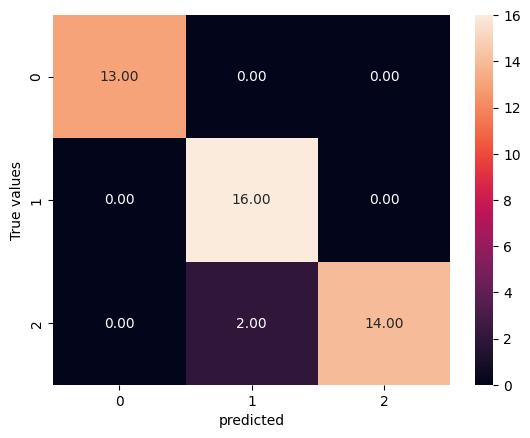

In [50]:
sns.heatmap(cn,annot=True,fmt='.2f')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.show()

The values along the diagonal are correct predict and the values above and below diagonal are no.of wrongly predicted values

classification report

The `classification_report` function is a utility in many machine learning libraries, such as scikit-learn, that provides a comprehensive report of the performance of a classification model on a test dataset. It computes various metrics to evaluate the model's performance, including precision, recall, F1-score, and support, for each class in the classification problem.

Here's what each metric represents:

1. **Precision**: Precision measures the ratio of true positive predictions to the total number of positive predictions made by the model. It indicates the model's ability to correctly classify positive instances without misclassifying negative instances as positive.

   Precision = (True Positives)/(True Positives + False Positives)

2. **Recall (Sensitivity)**: Recall measures the ratio of true positive predictions to the total number of actual positive instances in the dataset. It indicates the model's ability to correctly identify all positive instances, including those that are missed (false negatives).

   Recall = (True Positives)/(True Positives + False Negatives)

3. **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both precision and recall. It is particularly useful when the class distribution is imbalanced.

   F1-score = (2 x Precision xRecall)/(Precision + Recall)

4. **Support**: Support represents the number of actual occurrences of each class in the test dataset. It provides context for the other metrics and helps interpret the significance of the results.

The `classification_report` function typically presents these metrics in a tabular format, with each row corresponding to a different class in the classification problem. The report allows for a quick assessment of the model's performance across multiple classes and helps identify areas for improvement or further analysis.

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94        16
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



summary of the above classification_report

This classification report presents the performance metrics of a classification model across three classes. Let's interpret each section:

1. **Precision, Recall, and F1-score for Each Class**:
   - For class 0: Precision is 1.00, recall is 1.00, and F1-score is 1.00.
   - For class 1: Precision is 0.89, recall is 1.00, and F1-score is 0.94.
   - For class 2: Precision is 1.00, recall is 0.88, and F1-score is 0.93.
   - These metrics indicate the model's performance in correctly classifying instances of each class. For example, class 0 has perfect precision, recall, and F1-score, indicating that all instances of class 0 were correctly classified.

2. **Support**:
   - For class 0: There are 13 instances of class 0 in the test dataset.
   - For class 1: There are 16 instances of class 1 in the test dataset.
   - For class 2: There are 16 instances of class 2 in the test dataset.

3. **Overall Metrics**:
   - Accuracy: The accuracy of the model on the entire test dataset is 0.96 (or 96%).
   - Macro Average: This section provides the macro-averaged precision, recall, and F1-score across all classes. It computes the arithmetic mean of the metrics for each class without considering class imbalance.
   - Weighted Average: This section provides the weighted-average precision, recall, and F1-score across all classes. It computes the weighted mean of the metrics for each class, where each class's contribution is weighted by its support (number of occurrences).

In summary, the classification report demonstrates the model's excellent performance across all classes, with high precision, recall, and F1-score values. The weighted average metrics also indicate strong overall performance, with accuracy of 96%.